# Finite Difference Simulations
MIT 6.728: Applied Quantum and Statistical Physics

Shoumik Chowdhury (@shoumikc). Oct. 22, 2021.

## Imports + Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit
from NewtonFDSE import SystemSolver, plot_error, plot_error_log

## Initialize Simulation: ${\rm v}(y) = y^2$

We want to solve the dimensionless Schrodinger Eq. $$ \epsilon \psi(y) = -\frac{\partial^2}{\partial y^2} \psi(y) + y^2\psi(y)$$
to compute the ground state energy $\epsilon_0$ and wavefunction $\phi_0(y)$. Since this Hamiltonian describes the harmonic oscillator, we may solve it analytically to get $\epsilon_n = 2n+1$ and so $\epsilon_0= 1$, corresponding to $$\phi_0(y) = \bigg(\frac{1}{\pi^{1/4}}\bigg)e^{-y^2 / 2}$$

In [3]:
def phi0_HO(y):
    return ((1 / np.pi)**(1/4)) * np.exp(-y**2 / 2)

In [4]:
"""Define 1D potential v(y)"""
v = lambda y: y**2

"""Set parameters and initialize solver"""
N = 10000

params = {
    "N": N,
    "ymax": 5,
    "ε_range": [0.5, 1.5],
    "tol": 1e-10,
    "verbose": True,
    "use_noumerov": True
    
}

sys = SystemSolver(params, potential=v)

In [5]:
test_sol, _ = sys.solve(ε_guess=1.0)

Convergence!? ε = 1.0


In [6]:
grid = sys.grid
ψ_sol, ε_sol = sys.shootingNewton()

Iter 0: Trying with [0.5, 1.5]
Convergence!? ε = 1.0


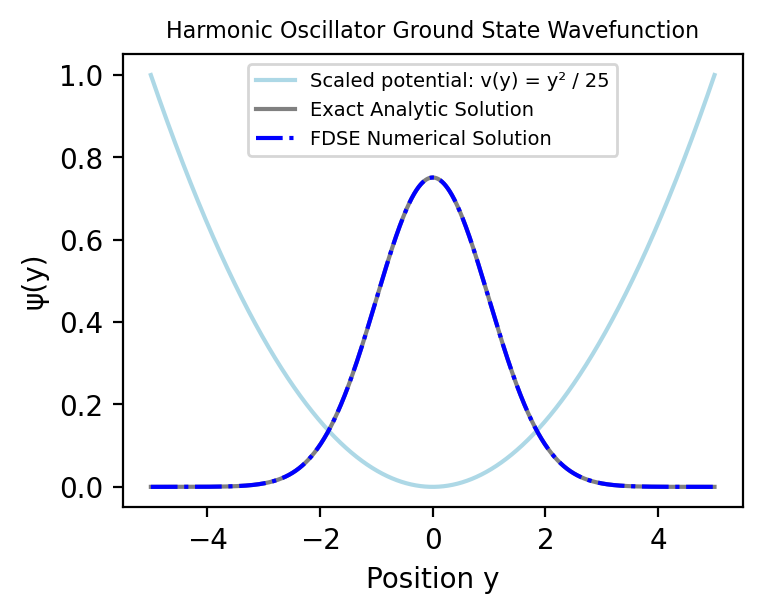

In [7]:
""" Plot Wavefunctions"""

fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
ax.plot(grid, v(grid)/25, 'lightblue', label="Scaled potential: v(y) = y² / 25")
ax.plot(grid, phi0_HO(grid), 'grey', label="Exact Analytic Solution")
ax.plot(grid, ψ_sol, 'b-.', label="FDSE Numerical Solution", )
ax.set_xlabel("Position y")
ax.set_ylabel("ψ(y)")
ax.set_title(f"Harmonic Oscillator Ground State Wavefunction", fontsize=8)
ax.legend(fontsize=7)

### Plot Error $w(h)$ vs. step-size $h$: 3-Point Scheme

In [8]:
h_range = np.arange(0.01, 0.5, 0.001)
hs = []; ws = []
params["verbose"] = False
params["use_numerov"] = False

for h_init in tqdm(h_range):
    
    N = params["ymax"] / h_init
    params["N"] = int(N)
    sys = SystemSolver(params, potential=v)
    ψ, _ = sys.shootingNewton()
    
    ws.append(np.average(np.abs(ψ - phi0_HO(sys.grid))))
    hs.append(sys.h)
    
hs = np.array(hs)
ws = np.array(ws)
xs = np.log10(hs)
ys = np.log10(ws)

100%|██████████| 490/490 [00:08<00:00, 55.02it/s] 


In [9]:
if sys.params['use_numerov']:
    print("hi")

In [10]:
def power(x, a, b, c):
    return a * (x ** b) + c
def linear(x, m, b):
    return (m * x) + b

popt_pow, _ = curve_fit(power, hs, ws)
popt_lin, _ = curve_fit(linear, xs, ys)

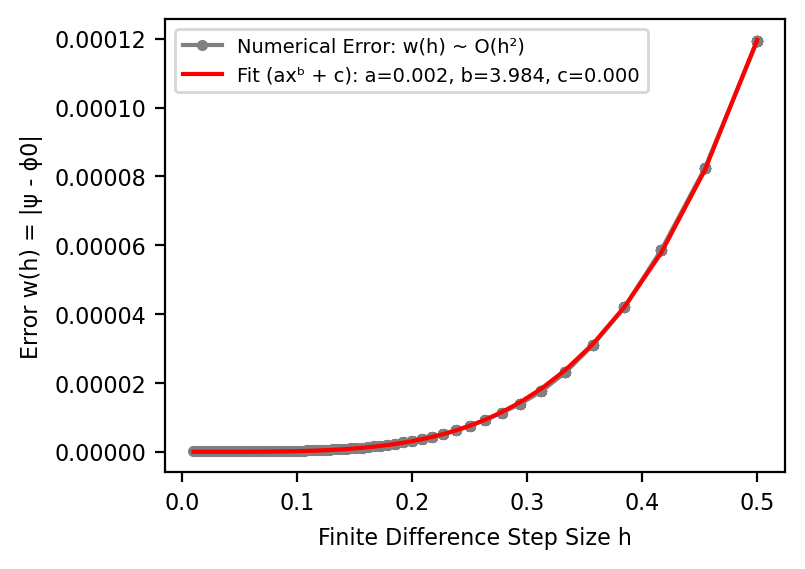

In [11]:
plot_error(hs, ws, power, popt_pow, "Numerical Error: w(h) ~ O(h²)", "Fit (axᵇ + c): a=%5.3f, b=%5.3f, c=%5.3f")


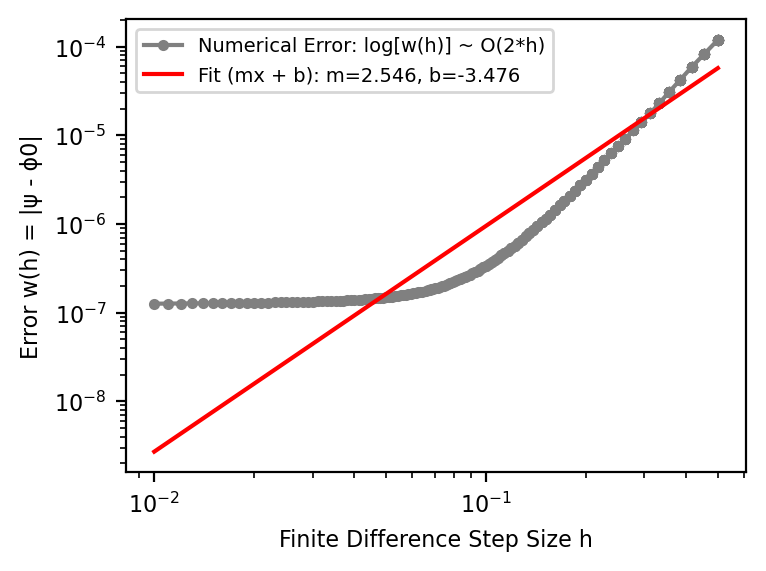

In [12]:
plot_error_log(xs, ys, linear, popt_lin, "Numerical Error: log[w(h)] ~ O(2*h)", "Fit (mx + b): m=%5.3f, b=%5.3f")


### Plot Error $w(h)$ vs. step-size $h$: Numerov Scheme

In [ ]:
h_range = np.arange(0.01, 0.5, 0.001)
hs = []; ws = []
params["verbose"] = False
params["use_numerov"] = True

for h_init in tqdm(h_range):
    
    N = params["ymax"] / h_init
    params["N"] = int(N)
    sys = SystemSolver(params, potential=v)
    ψ_sol, _ = sys.shootingNewton()
    
    ws.append(np.average(np.abs(ψ_sol - phi0_HO(sys.grid))))
    hs.append(sys.h)
    
hs = np.array(hs)
ws = np.array(ws)
xs = np.log10(hs)
ys = np.log10(ws)

In [ ]:
def power(x, a, b, c):
    return a * (x ** b) + c
def linear(x, m, b):
    return (m * x) + b

popt_pow, _ = curve_fit(power, hs, ws)
popt_lin, _ = curve_fit(linear, xs[200:], ys[200:])

In [ ]:
popt_lin

In [ ]:
plot_error(hs, ws, power, popt_pow, "Numerical Error: w(h) ~ O(h⁴)", "Fit (axᵇ + c): a=%5.3f, b=%5.3f, c=%5.3f") #²


In [ ]:
plot_error_log(xs, ys, linear, popt_lin, "Numerical Error: log[w(h)] ~ O(4*h)", "Fit (mx + b): m=%5.3f, b=%5.3f")


## Initialize Simulation: ${\rm v}(y) = y^4$

We want to solve the dimensionless Schrodinger Eq. $$ \epsilon \psi(y) = -\frac{\partial^2}{\partial y^2} \psi(y) + y^4\psi(y)$$
to compute the ground state energy $\epsilon_0$ and wavefunction $\phi_0(y)$. 

In [ ]:
"""Define 1D potential v(y)"""
v = lambda y: y**4

"""Set parameters and initialize solver"""
N = 10000

params = {
    "N": N,
    "ymax": 8,
    "ε_range": [1.0, 1.1],
    "tol": 1e-12,
    "verbose": True,
    "use_noumerov": False
    
}

sys = SystemSolver(params, potential=v)

In [ ]:
grid = sys.grid
ψ_sol_exact, ε_sol_exact = sys.shootingNewton()

In [ ]:
""" Plot Wavefunctions"""

fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
ax.plot(grid, v(grid)/2500, 'lightblue', label="Scaled potential: v(y) = y⁴ / 2500")
ax.plot(grid, phi0_HO(grid), 'grey', label="Harmonic Oscillator ϕ0")
ax.set_xlabel("Position y")
ax.plot(grid, ψ_sol_exact, 'b-.', label="FDSE Numerical Solution")
ax.set_ylabel("ψ(y)")
ax.set_title(f"Quartic Well Ground State Wavefunction", fontsize=8)
ax.legend(fontsize=7)